In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fbprophet


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /home/chaitra/anaconda3/lib/python3.7/site-packages (5.1.0)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import fbprophet 


In [5]:
fbprophet.__version__

'0.7.1'

In [6]:
np.__version__

'1.19.5'

In [7]:
df = pd.read_csv('data_set/salesdaily.csv',parse_dates = True)

In [8]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [9]:
df.tail()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday
2105,10/8/2019,0.33,1.730,0.50,44.30,20.0,2.0,2.0,0.00,2019,10,190,Tuesday


In [10]:
def timeseries_evaluation_metrics(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['Weekday Name']] = df.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [12]:
df.head(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,4
1,1/3/2014,8.00,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,0
2,1/4/2014,2.00,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,2
3,1/5/2014,4.00,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,3
4,1/6/2014,5.00,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,1
5,1/7/2014,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,2014,1,276,5
6,1/8/2014,5.33,3.00,10.5,26.40,19.0,1.0,10.0,0.0,2014,1,276,6
7,1/9/2014,7.00,1.68,8.0,25.00,16.0,0.0,3.0,2.0,2014,1,276,4
8,1/10/2014,5.00,2.00,2.0,53.30,15.0,2.0,0.0,2.0,2014,1,276,0
9,1/11/2014,5.00,4.34,10.4,52.30,14.0,0.0,1.0,0.2,2014,1,276,2


In [13]:
df = df.rename(columns={'datum': 'ds', 'M01AB': 'y'})


In [14]:
validate = df[['ds','y']].tail(48)

df.drop(df[['ds','y']].tail(48).index,inplace=True)

train = df[['ds','y']]


In [15]:
df.head()

,ds,y,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,4
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,0
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,2
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,3
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,1


In [16]:
m = fbprophet.Prophet(yearly_seasonality=True,daily_seasonality=True)

In [17]:
m.fit(train)


In [18]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [19]:
forecast = m.predict(future)
#forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
43,2019-08-22 20:00:00,1.137486,-2.507596,4.264491
44,2019-08-22 21:00:00,1.533059,-1.810934,4.686610
45,2019-08-22 22:00:00,2.929008,-0.484200,6.345038
46,2019-08-22 23:00:00,4.551529,1.004316,7.997243
47,2019-08-23 00:00:00,5.290681,2.022398,8.809378


In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-21 01:00:00,2.260835,1.255668,8.077158,2.260835,2.260835,2.358221,2.358221,2.358221,2.220224e+00,...,-0.223362,-0.223362,-0.223362,0.361358,0.361358,0.361358,0.0,0.0,0.0,4.619056
1,2019-08-21 02:00:00,2.260847,-0.363799,6.366945,2.260847,2.260847,0.763188,0.763188,0.763188,6.326862e-01,...,-0.231462,-0.231462,-0.231462,0.361964,0.361964,0.361964,0.0,0.0,0.0,3.024034
2,2019-08-21 03:00:00,2.260858,-1.817919,5.247065,2.260858,2.260858,-0.607797,-0.607797,-0.607797,-7.305631e-01,...,-0.239798,-0.239798,-0.239798,0.362565,0.362565,0.362565,0.0,0.0,0.0,1.653061
3,2019-08-21 04:00:00,2.260869,-2.073400,4.922101,2.260869,2.260869,-0.981114,-0.981114,-0.981114,-1.095845e+00,...,-0.248429,-0.248429,-0.248429,0.363160,0.363160,0.363160,0.0,0.0,0.0,1.279755
4,2019-08-21 05:00:00,2.260880,-1.680323,5.331991,2.260880,2.260880,-0.488569,-0.488569,-0.488569,-5.949072e-01,...,-0.257411,-0.257411,-0.257411,0.363750,0.363750,0.363750,0.0,0.0,0.0,1.772312
5,2019-08-21 06:00:00,2.260892,-1.124651,5.895015,2.260892,2.260892,0.097540,0.097540,0.097540,-8.825287e-10,...,-0.266795,-0.266795,-0.266795,0.364335,0.364335,0.364335,0.0,0.0,0.0,2.358431
6,2019-08-21 07:00:00,2.260903,-0.814142,5.796692,2.260903,2.260903,0.148387,0.148387,0.148387,6.009783e-02,...,-0.276624,-0.276624,-0.276624,0.364914,0.364914,0.364914,0.0,0.0,0.0,2.409290
7,2019-08-21 08:00:00,2.260914,-1.375789,5.369239,2.260914,2.260914,-0.286729,-0.286729,-0.286729,-3.652816e-01,...,-0.286935,-0.286935,-0.286935,0.365487,0.365487,0.365487,0.0,0.0,0.0,1.974185
8,2019-08-21 09:00:00,2.260926,-1.762547,4.989478,2.260926,2.260926,-0.662261,-0.662261,-0.662261,-7.305631e-01,...,-0.297754,-0.297754,-0.297754,0.366056,0.366056,0.366056,0.0,0.0,0.0,1.598664
9,2019-08-21 10:00:00,2.260937,-1.587594,4.768429,2.260937,2.260937,-0.575165,-0.575165,-0.575165,-6.326862e-01,...,-0.309097,-0.309097,-0.309097,0.366618,0.366618,0.366618,0.0,0.0,0.0,1.685772


In [21]:
timeseries_evaluation_metrics(validate.y,forecast.yhat)

MSE is : 20.447162477586172
MAE is : 3.577109997990297
RMSE is : 4.5218538761868645
MAPE is : 84.05978218092898
R2 is : -1.3845065350607864



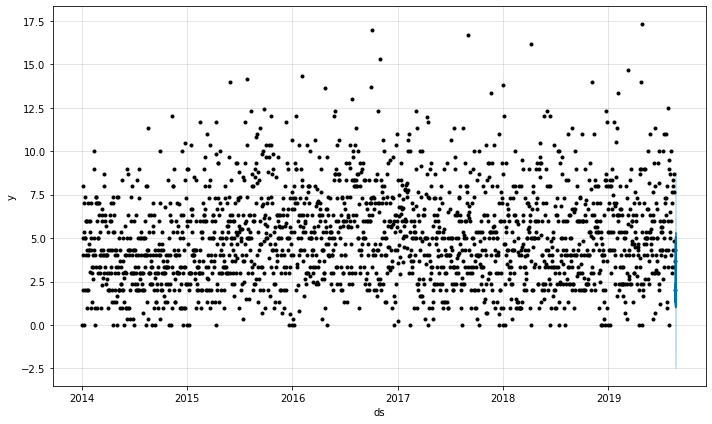

In [22]:
fig1 = m.plot(forecast)

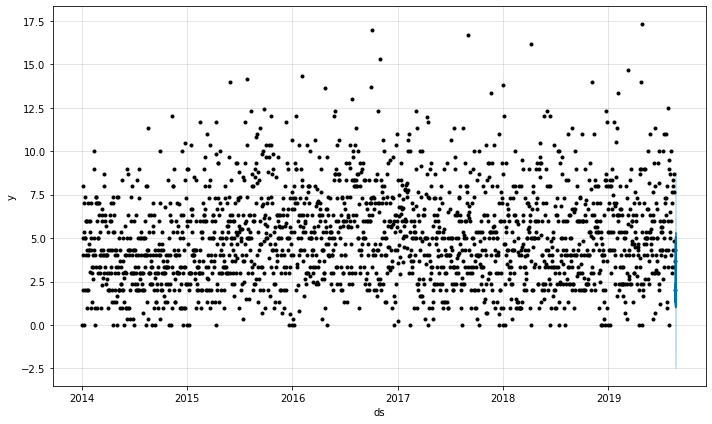

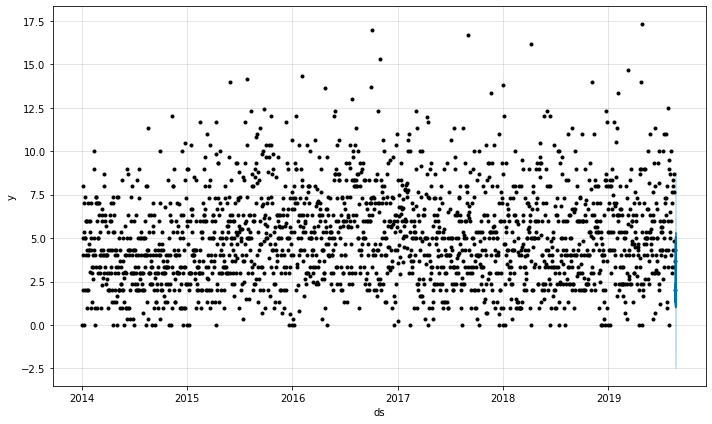

In [23]:
m.plot(forecast)

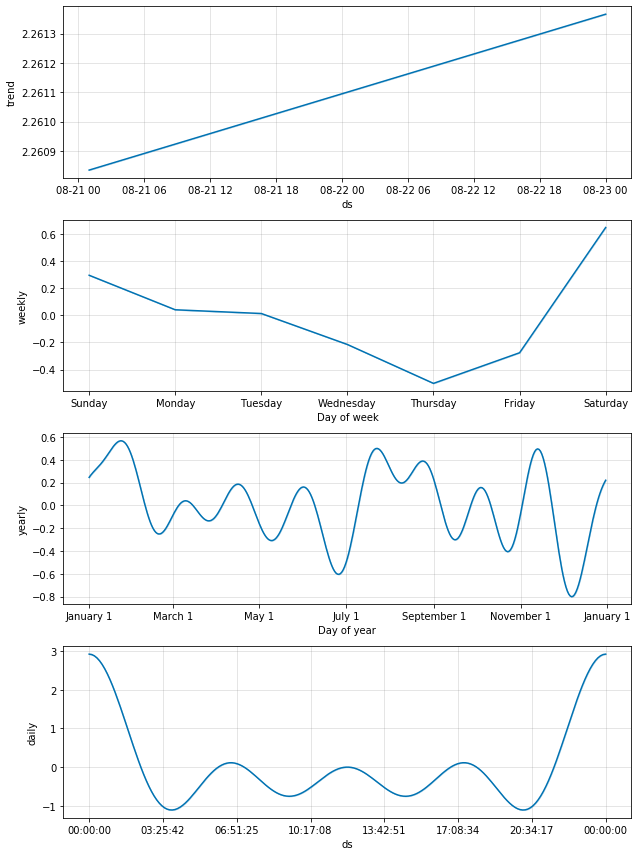

In [24]:
fig2 = m.plot_components(forecast)

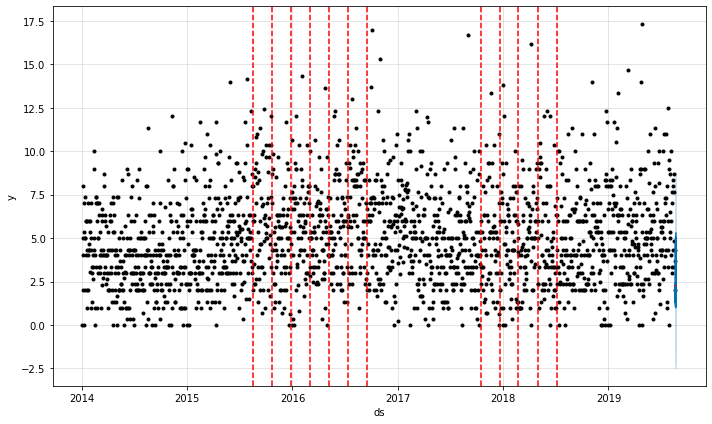

In [25]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [26]:
future = m.make_future_dataframe(periods = 7, freq = 'D')  

In [27]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-08-22 20:00:00,1.137486,-2.507596,4.264491
44,2019-08-22 21:00:00,1.533059,-1.810934,4.686610
45,2019-08-22 22:00:00,2.929008,-0.484200,6.345038
46,2019-08-22 23:00:00,4.551529,1.004316,7.997243
47,2019-08-23 00:00:00,5.290681,2.022398,8.809378


In [28]:
timeseries_evaluation_metrics(validate.y,forecast.yhat)

MSE is : 20.447162477586172
MAE is : 3.577109997990297
RMSE is : 4.5218538761868645
MAPE is : 84.05978218092898
R2 is : -1.3845065350607864



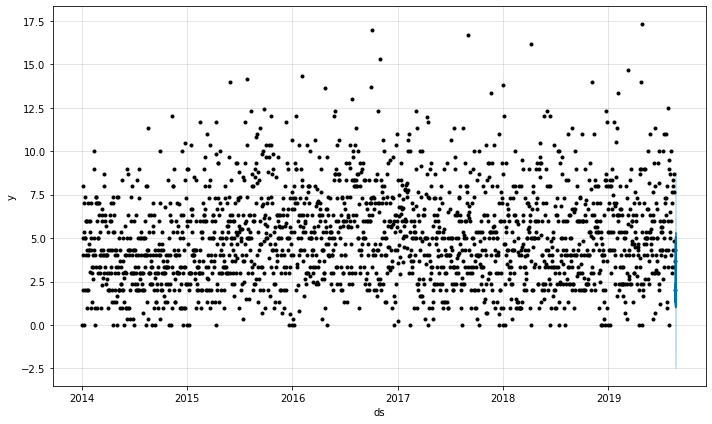

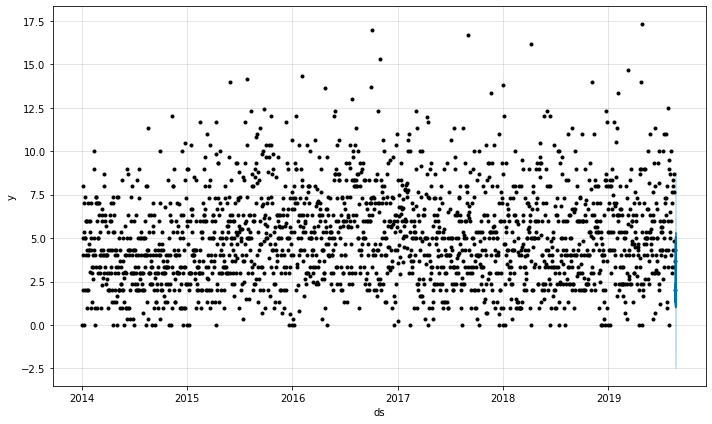

In [29]:
m.plot(forecast)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-21 01:00:00,2.260835,1.255668,8.077158,2.260835,2.260835,2.358221,2.358221,2.358221,2.220224e+00,...,-0.223362,-0.223362,-0.223362,0.361358,0.361358,0.361358,0.0,0.0,0.0,4.619056
1,2019-08-21 02:00:00,2.260847,-0.363799,6.366945,2.260847,2.260847,0.763188,0.763188,0.763188,6.326862e-01,...,-0.231462,-0.231462,-0.231462,0.361964,0.361964,0.361964,0.0,0.0,0.0,3.024034
2,2019-08-21 03:00:00,2.260858,-1.817919,5.247065,2.260858,2.260858,-0.607797,-0.607797,-0.607797,-7.305631e-01,...,-0.239798,-0.239798,-0.239798,0.362565,0.362565,0.362565,0.0,0.0,0.0,1.653061
3,2019-08-21 04:00:00,2.260869,-2.073400,4.922101,2.260869,2.260869,-0.981114,-0.981114,-0.981114,-1.095845e+00,...,-0.248429,-0.248429,-0.248429,0.363160,0.363160,0.363160,0.0,0.0,0.0,1.279755
4,2019-08-21 05:00:00,2.260880,-1.680323,5.331991,2.260880,2.260880,-0.488569,-0.488569,-0.488569,-5.949072e-01,...,-0.257411,-0.257411,-0.257411,0.363750,0.363750,0.363750,0.0,0.0,0.0,1.772312
5,2019-08-21 06:00:00,2.260892,-1.124651,5.895015,2.260892,2.260892,0.097540,0.097540,0.097540,-8.825287e-10,...,-0.266795,-0.266795,-0.266795,0.364335,0.364335,0.364335,0.0,0.0,0.0,2.358431
6,2019-08-21 07:00:00,2.260903,-0.814142,5.796692,2.260903,2.260903,0.148387,0.148387,0.148387,6.009783e-02,...,-0.276624,-0.276624,-0.276624,0.364914,0.364914,0.364914,0.0,0.0,0.0,2.409290
7,2019-08-21 08:00:00,2.260914,-1.375789,5.369239,2.260914,2.260914,-0.286729,-0.286729,-0.286729,-3.652816e-01,...,-0.286935,-0.286935,-0.286935,0.365487,0.365487,0.365487,0.0,0.0,0.0,1.974185
8,2019-08-21 09:00:00,2.260926,-1.762547,4.989478,2.260926,2.260926,-0.662261,-0.662261,-0.662261,-7.305631e-01,...,-0.297754,-0.297754,-0.297754,0.366056,0.366056,0.366056,0.0,0.0,0.0,1.598664
9,2019-08-21 10:00:00,2.260937,-1.587594,4.768429,2.260937,2.260937,-0.575165,-0.575165,-0.575165,-6.326862e-01,...,-0.309097,-0.309097,-0.309097,0.366618,0.366618,0.366618,0.0,0.0,0.0,1.685772


In [31]:
future = m.make_future_dataframe(periods = 5, freq = 'MS')  

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2058,2019-09-01,5.721480,2.205780,8.910053
2059,2019-10-01,5.320027,1.848463,8.763105
2060,2019-11-01,4.819031,1.499849,8.121522
2061,2019-12-01,4.920223,1.727616,8.136573
2062,2020-01-01,5.235037,1.988640,8.705429


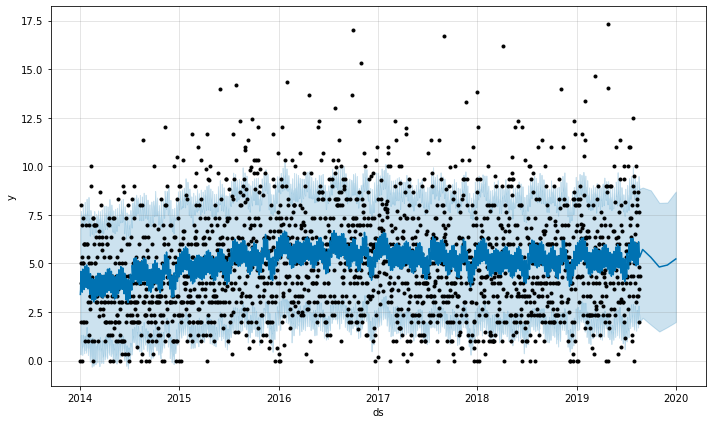

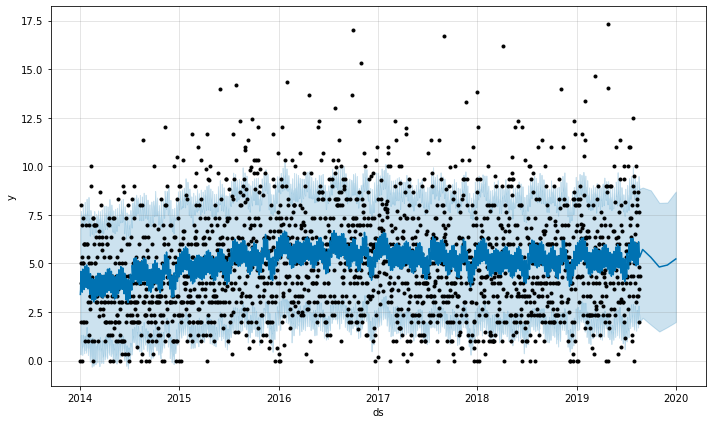

In [32]:
m.plot(forecast)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-02,0.730411,0.324407,6.837913,0.730411,0.730411,2.679489,2.679489,2.679489,2.922253,...,-0.501924,-0.501924,-0.501924,0.259160,0.259160,0.259160,0.0,0.0,0.0,3.409901
1,2014-01-03,0.732966,0.322051,6.839623,0.732966,0.732966,2.921140,2.921140,2.921140,2.922253,...,-0.276309,-0.276309,-0.276309,0.275196,0.275196,0.275196,0.0,0.0,0.0,3.654106
2,2014-01-04,0.735521,1.313826,7.697149,0.735521,0.735521,3.858265,3.858265,3.858265,2.922253,...,0.646203,0.646203,0.646203,0.289809,0.289809,0.289809,0.0,0.0,0.0,4.593786
3,2014-01-05,0.738076,0.941294,7.573683,0.738076,0.738076,3.520167,3.520167,3.520167,2.922253,...,0.294417,0.294417,0.294417,0.303497,0.303497,0.303497,0.0,0.0,0.0,4.258243
4,2014-01-06,0.740630,0.755842,7.483913,0.740630,0.740630,3.279262,3.279262,3.279262,2.922253,...,0.040283,0.040283,0.040283,0.316726,0.316726,0.316726,0.0,0.0,0.0,4.019892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2019-09-01,2.263806,2.205780,8.910053,2.263806,2.263806,3.457673,3.457673,3.457673,2.922253,...,0.294417,0.294417,0.294417,0.241003,0.241003,0.241003,0.0,0.0,0.0,5.721480
2059,2019-10-01,2.271941,1.848463,8.763105,2.269501,2.274398,3.048086,3.048086,3.048086,2.922253,...,0.012763,0.012763,0.012763,0.113071,0.113071,0.113071,0.0,0.0,0.0,5.320027
2060,2019-11-01,2.280346,1.499849,8.121522,2.272105,2.289034,2.538685,2.538685,2.538685,2.922253,...,-0.276309,-0.276309,-0.276309,-0.107259,-0.107259,-0.107259,0.0,0.0,0.0,4.819031
2061,2019-12-01,2.288480,1.727616,8.136573,2.271767,2.305072,2.631743,2.631743,2.631743,2.922253,...,0.294417,0.294417,0.294417,-0.584927,-0.584927,-0.584927,0.0,0.0,0.0,4.920223


In [121]:
validate['y'].shape


(48,)

In [122]:
forecast['yhat'].shape

(48,)

In [123]:
forecast['yhat'].values

array([ 4.60120736,  3.08547114,  1.6497711 ,  1.24654376,  1.79138963,
        2.28442325,  2.3097688 ,  1.91723056,  1.63365421,  1.67115528,
        2.34307968,  2.60469195,  2.26610972,  1.81409814,  1.74848592,
        2.19915963,  2.56378294,  2.46189472,  1.89251827,  1.27158285,
        1.5990359 ,  3.00812997,  4.69285494,  5.33684763,  4.58703942,
        3.0163422 ,  1.52679575,  1.11985315,  1.66256827,  2.35041511,
        2.35309814,  1.89137361,  1.56546203,  1.56327314,  1.95024195,
        2.22670789,  2.10117351,  1.64584493,  1.53134234,  1.96074701,
        2.60417639,  2.53618703,  2.0037922 ,  1.6179253 ,  1.96372814,
        3.34499268,  5.02864893, -1.27706849])

In [124]:
timeseries_evaluation_metrics(validate.y,forecast.yhat)

MSE is : 18.701479331843824
MAE is : 3.360171398418386
RMSE is : 4.324520705447463
MAPE is : 61.043408632345866
R2 is : -1.1809285142116317



## fbprophet_with_log_transformation

In [61]:
df= df[df['y'] != 0]

In [62]:
train = df[['ds','y']]

In [63]:
train.head()

,ds,y
1,1/3/2014,8.00
2,1/4/2014,2.00
3,1/5/2014,4.00
4,1/6/2014,5.00
6,1/8/2014,5.33


In [64]:
train['y'] = np.log(train['y'])

/home/chaitra/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [65]:
m = fbprophet.Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(train)

In [70]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [71]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-08-22 20:00:00,2.414133,1.633048,3.193720
44,2019-08-22 21:00:00,2.334053,1.502602,3.112255
45,2019-08-22 22:00:00,2.024558,1.286275,2.827287
46,2019-08-22 23:00:00,1.663940,0.917841,2.442666
47,2019-08-23 00:00:00,1.507942,0.725533,2.311250


In [72]:
forecast['yhat'] = np.exp(forecast['yhat'])  

In [73]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-08-22 20:00:00,11.180077,1.633048,3.193720
44,2019-08-22 21:00:00,10.319678,1.502602,3.112255
45,2019-08-22 22:00:00,7.572762,1.286275,2.827287
46,2019-08-22 23:00:00,5.280074,0.917841,2.442666
47,2019-08-23 00:00:00,4.517426,0.725533,2.311250


In [74]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-21 01:00:00,2.160390,0.924177,2.440010,2.160390,2.160390,-0.493269,-0.493269,-0.493269,-0.511652,...,-0.062653,-0.062653,-0.062653,0.081036,0.081036,0.081036,0.0,0.0,0.0,5.296894
1,2019-08-21 02:00:00,2.160389,1.270943,2.882083,2.160389,2.160389,-0.127382,-0.127382,-0.127382,-0.145803,...,-0.062641,-0.062641,-0.062641,0.081061,0.081061,0.081061,0.0,0.0,0.0,7.637012
2,2019-08-21 03:00:00,2.160387,1.567786,3.168938,2.160387,2.160387,0.186913,0.186913,0.186913,0.168359,...,-0.062532,-0.062532,-0.062532,0.081086,0.081086,0.081086,0.0,0.0,0.0,10.457301
3,2019-08-21 04:00:00,2.160386,1.705304,3.188050,2.160386,2.160386,0.271298,0.271298,0.271298,0.252538,...,-0.062351,-0.062351,-0.062351,0.081110,0.081110,0.081110,0.0,0.0,0.0,11.378023
4,2019-08-21 05:00:00,2.160385,1.523712,3.109836,2.160385,2.160385,0.156108,0.156108,0.156108,0.137097,...,-0.062123,-0.062123,-0.062123,0.081134,0.081134,0.081134,0.0,0.0,0.0,10.140050


In [75]:
timeseries_evaluation_metrics(validate.y,forecast['yhat'])

MSE is : 24.0157298485677
MAE is : 4.259049405672815
RMSE is : 4.9005846435469005
MAPE is : 158.4590860365637
R2 is : -1.8006656097606557



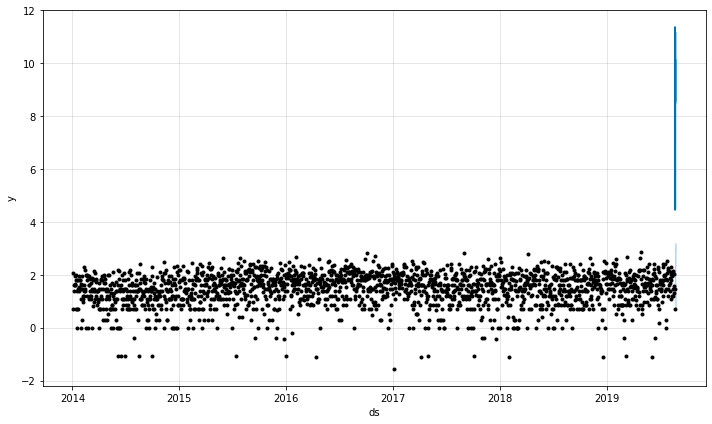

In [76]:
fig1 = m.plot(forecast)

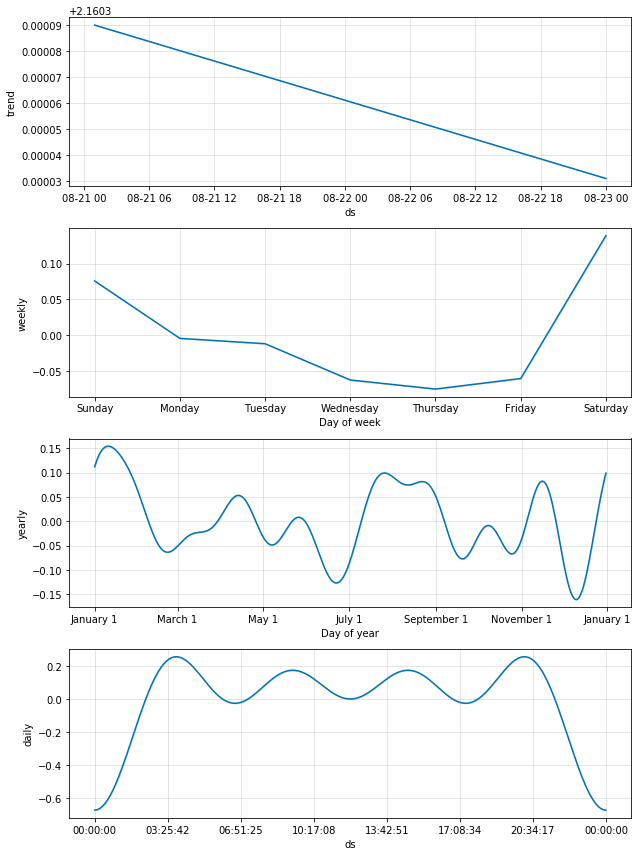

In [77]:
fig2 = m.plot_components(forecast)

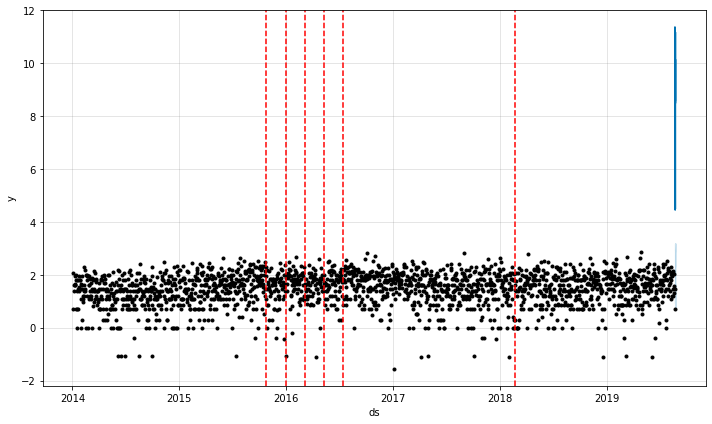

In [78]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [79]:
p = 48
future = m.make_future_dataframe(periods=p,freq='D',include_history=False)

In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-10-04,1.406078,0.691912,2.245012
44,2019-10-05,1.609300,0.898649,2.349190
45,2019-10-06,1.549046,0.750818,2.376481
46,2019-10-07,1.471029,0.675930,2.246988
47,2019-10-08,1.464763,0.690087,2.222996


In [81]:
forecast['yhat'] = np.exp(forecast['yhat'])  

In [82]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-10-04,4.079923,0.691912,2.245012
44,2019-10-05,4.999308,0.898649,2.349190
45,2019-10-06,4.706978,0.750818,2.376481
46,2019-10-07,4.353713,0.675930,2.246988
47,2019-10-08,4.326516,0.690087,2.222996


In [83]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-22,2.160361,0.660931,2.348281,2.160361,2.160361,-0.667137,-0.667137,-0.667137,-0.673435,...,-0.075180,-0.075180,-0.075180,0.081478,0.081478,0.081478,0.0,0.0,0.0,4.451426
1,2019-08-23,2.160331,0.736845,2.261962,2.160331,2.160331,-0.652389,-0.652389,-0.652389,-0.673435,...,-0.060518,-0.060518,-0.060518,0.081564,0.081564,0.081564,0.0,0.0,0.0,4.517426
2,2019-08-24,2.160301,0.934964,2.447481,2.160301,2.160301,-0.453331,-0.453331,-0.453331,-0.673435,...,0.138927,0.138927,0.138927,0.081176,0.081176,0.081176,0.0,0.0,0.0,5.512235
3,2019-08-25,2.160271,0.916950,2.414617,2.160271,2.160271,-0.517519,-0.517519,-0.517519,-0.673435,...,0.075684,0.075684,0.075684,0.080231,0.080231,0.080231,0.0,0.0,0.0,5.169375
4,2019-08-26,2.160241,0.736416,2.334145,2.160241,2.160241,-0.599234,-0.599234,-0.599234,-0.673435,...,-0.004454,-0.004454,-0.004454,0.078655,0.078655,0.078655,0.0,0.0,0.0,4.763617


In [84]:
timeseries_evaluation_metrics(validate.y,forecast['yhat'])

MSE is : 9.654016871655099
MAE is : 2.5795471623293857
RMSE is : 3.107091384503375
MAPE is : 77.96448665386932
R2 is : -0.12583182851326558



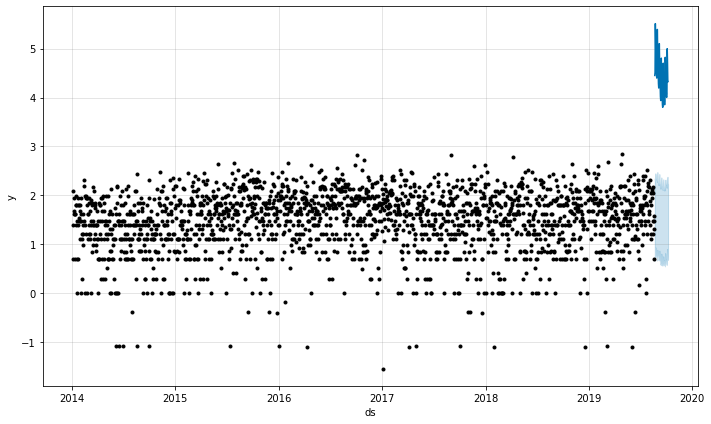

In [85]:
fig1 = m.plot(forecast)

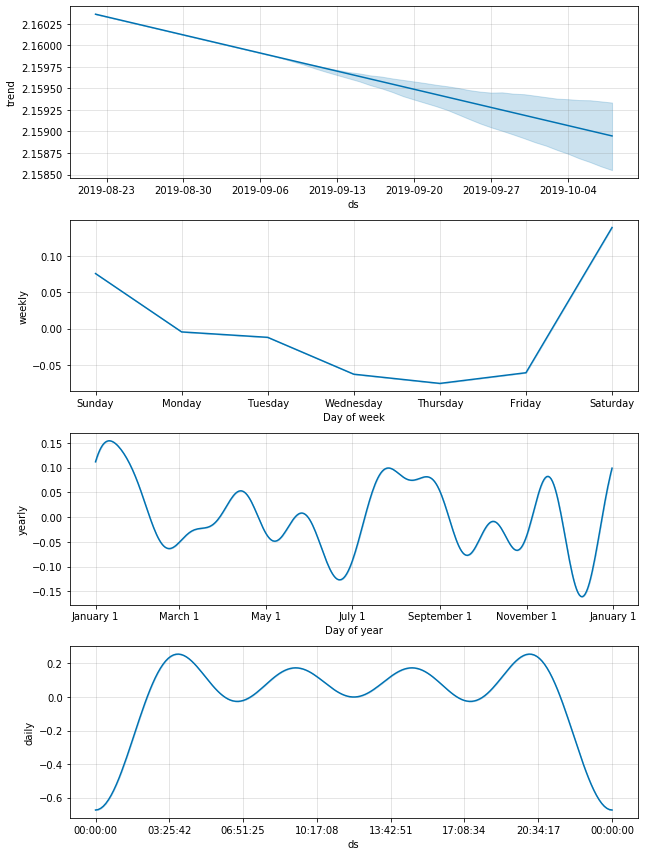

In [86]:
fig2 = m.plot_components(forecast)

In [87]:
df = pd.read_csv('data_set/salesdaily.csv',parse_dates = True)

In [88]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [91]:
enc = LabelEncoder()
df.loc[:,['Weekday Name']] = df.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [94]:
df = df.rename(columns={'datum': 'ds', 'M01AB': 'y'})

In [95]:
validate = df[['ds','y','Year','Month','Hour','Weekday Name']].tail(48)

In [96]:
df.drop(df[['ds','y','Year','Month','Hour','Weekday Name']].tail(48).index,inplace=True)

In [97]:
train = df[['ds','y','Year','Month','Hour','Weekday Name']]

In [102]:
m = fbprophet.Prophet( yearly_seasonality=True,daily_seasonality=True)
m.add_regressor('Year')
m.add_regressor('Month')
m.add_regressor('Hour')
m.add_regressor('Weekday Name')


In [103]:
m.fit(train)

In [105]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [108]:
future['Year'] = validate['Year'].values 
future['Month'] = validate['Month'].values 
future['Hour'] =  validate['Hour'].values
future['Weekday Name'] = validate['Weekday Name'].values 


In [109]:
forecast = m.predict(future)

In [110]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Hour,Hour_lower,Hour_upper,Month,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-21 01:00:00,2.095933,1.152624,7.733501,2.095933,2.095933,0.0011,0.0011,0.0011,0.50962,...,-0.156669,-0.156669,-0.156669,-0.112974,-0.112974,-0.112974,0.0,0.0,0.0,4.601207
1,2019-08-21 02:00:00,2.095940,-0.180233,6.656198,2.095940,2.095940,0.0011,0.0011,0.0011,0.50962,...,-0.165664,-0.165664,-0.165664,-0.113171,-0.113171,-0.113171,0.0,0.0,0.0,3.085471
2,2019-08-21 03:00:00,2.095947,-1.830644,5.035671,2.095947,2.095947,0.0011,0.0011,0.0011,0.50962,...,-0.174902,-0.174902,-0.174902,-0.113373,-0.113373,-0.113373,0.0,0.0,0.0,1.649771
3,2019-08-21 04:00:00,2.095954,-2.112293,4.356493,2.095954,2.095954,0.0011,0.0011,0.0011,0.50962,...,-0.184441,-0.184441,-0.184441,-0.113582,-0.113582,-0.113582,0.0,0.0,0.0,1.246544
4,2019-08-21 05:00:00,2.095962,-1.626915,5.035898,2.095962,2.095962,0.0011,0.0011,0.0011,0.50962,...,-0.194338,-0.194338,-0.194338,-0.113797,-0.113797,-0.113797,0.0,0.0,0.0,1.791390


In [112]:
timeseries_evaluation_metrics(validate.y,forecast.yhat)

MSE is : 18.701479331843824
MAE is : 3.360171398418386
RMSE is : 4.324520705447463
MAPE is : 61.043408632345866
R2 is : -1.1809285142116317



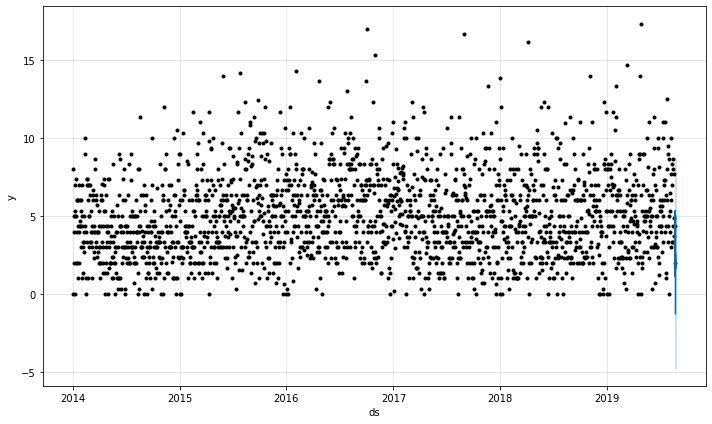

In [113]:
fig1 = m.plot(forecast)

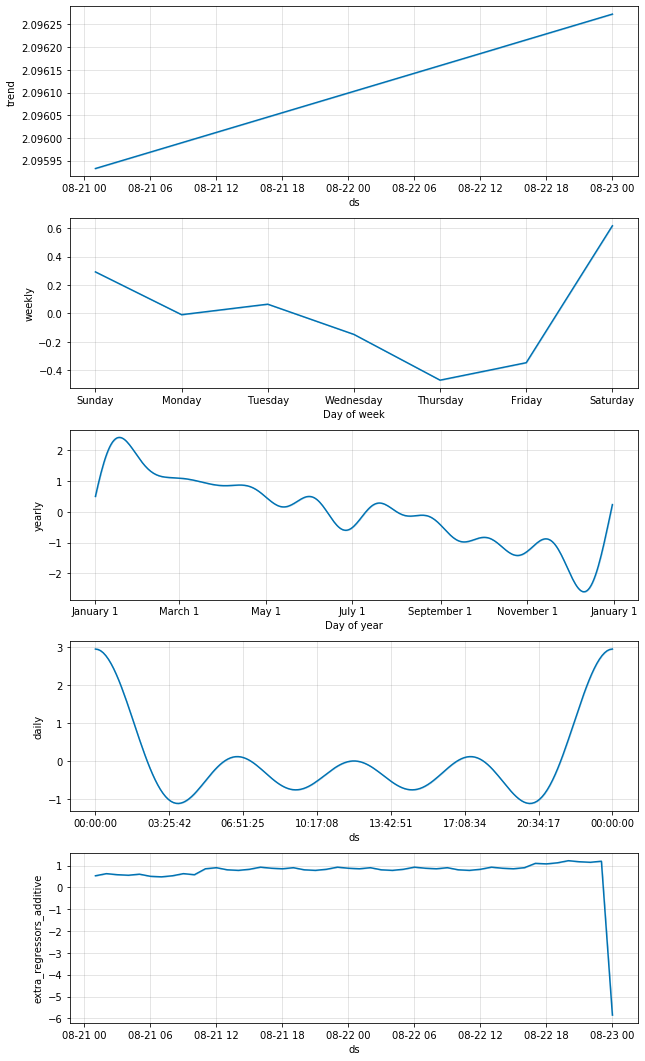

In [114]:
fig2 = m.plot_components(forecast)

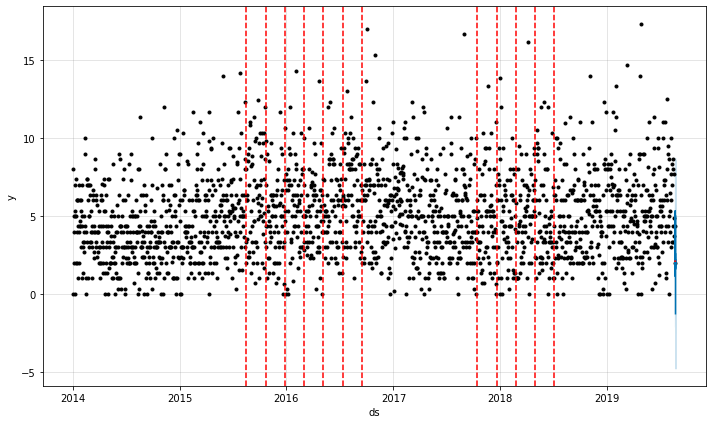

In [115]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)